# Further Text Analysis

## Install packages

First we need to install the various Python libraries and resources that we will use in this workbook.

(If you receive an error when running the following code block it is probably because the package is already installed, this is not a problem)

**wordcloud** - used to creat a visualization

**textblob** - for sentiment analysis

**stopwords** - provides a list of common words to exclude from analysis

**punkt** - helps with tokenization

In [34]:
!pip install textblob
!pip install scikit-learn
!pip install tk
!pip install pandas


ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 1.6 MB/s eta 0:00:0000:0100:01m
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


In [84]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

import csv
import urllib3
import re
from collections import Counter
import operator

from textblob import TextBlob

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /Users/xan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/xan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Download file via a URL

We will use the following technique to download a CSV from the web and write to local CSV file.

In this case the file is a CSV file containing all of Donald Trump's tweets up to 4th November 2020. (The file can be found in the file list in the Noteable home tab. You can download from here for later use if desired).

NOTE: If you've already done Notebook 1, and still have the files `tweets.csv` and `tweets.txt`, you can skip ahead to the section, <b>Concordance</b>

In [24]:
url = 'https://learn.edina.ac.uk/data/trump-tweet-archive.csv'  # download the file

response = urllib3.request('GET', url)  # assign the contents of the file to a variable (csv)
output = response.data

with open('tweets.csv', 'wb') as new_file:  # create a new file and save the contents of 'csv' to this file
    new_file.write(output)

    print('New CSV file created')

New CSV file created


## Inspect our new file

We will use Python code to inspect the tweets file

Open the file and print out the first N rows

The number of rows (N) is set to 5 - change this to see more.

In [29]:
with open('tweets.csv', 'r') as csv_file:  # open the csv data file
    reader = csv.reader(csv_file)
    tweets = list(reader)
    
N = 5 # Change this number to view more/fewer lines
    
for row in tweets[1:N+1]: # skip the header row
    print(row)

['1698308935', '2009-05-04 18:54:25', 'Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!']
['1701461182', '2009-05-05 01:00:10', 'Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!']
['1737479987', '2009-05-08 13:38:08', 'Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!']
['1741160716', '2009-05-08 20:40:15', 'New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e']
['1773561338', '2009-05-12 14:07:28', '"My persona will never be that of a wallflower - I’d rather build walls than cling to them" --Donald J. Trump']


## Reverse the output

We can also read the file in reverse order. This is useful in this case as we can view the latest tweets from Donald Trump. Again, you can change the variable 'N' to alter the number of tweets returned.

In [28]:
N = 5 # Change this number to view more/fewer lines

for row in list(reversed(tweets))[:5]:
        print(row)

['1324139647111409667', '2020-11-05 00:01:07', 'Detroit Absentee Ballot Counting Chaos, Blocked Windows and Observers https://t.co/KzIwhbQrDt via @BreitbartNews']
['1324108206801563650', '2020-11-04 21:56:11', '.....there was a large number of secretly dumped ballots as has been widely reported!']
['1324061986779504642', '2020-11-04 18:52:32', 'We are winning Pennsylvania big, but the PA Secretary of State just announced that there are “Millions of ballots left to be counted.”']
['1324033983882166272', '2020-11-04 17:01:15', 'They are working hard to make up 500,000 vote advantage in Pennsylvania disappear — ASAP. Likewise, Michigan and others!']
['1324012948965261312', '2020-11-04 15:37:40', 'RT @MattMackowiak: An update gives Biden 100% of new votes — 128k+ https://t.co/SPUrTf8gXN']


## Write Tweets to text file

For the next step we need to export the tweet text and write it to a text file. This simplifies the structure and makes much analysis easier.

• We will ignore the tweet id and the date

• We will exclude any retweets

In [6]:
csv_file = open('tweets.csv', 'r')  # open the csv data file
next(csv_file, None)  # skip the header row
reader = csv.reader(csv_file)

# create/open output file
text_file = open('tweets.txt','w')


for row in reader:

    tweet = row[2]
    if ('RT @' not in tweet): # Exclude retweets
       text_file.write(tweet + '\n')

csv_file.close()
text_file.close()

print("Tweets written to 'tweets.txt'")

Tweets written to 'tweets.txt'


## Concordance

This is a useful technique for finding the context of all instances of a particular word in the document. 

This example uses the word 'nasty' as an example but you can change this in the last line of the code block below.

You can also change the number of characters shown (width) and the number of lines.


In [31]:
with open('tweets.txt') as file:
    tweets = file.read()

tokens=nltk.word_tokenize(tweets)
text=nltk.Text(tokens)

print(text.concordance('nasty', width=80, lines=25)) # Experiment by exchanging the word 'nasty' for another term.

# The 'width' controls the number of characters shown while the 'lines' controls the number of lines shown


Displaying 25 of 56 matches:
ly . The GOP primary is getting very nasty . The candidates need to remember th
onderful guy , did n't mean to be so nasty to @ MittRomney . He was just ( cont
top with the bad plastic surgery and nasty statements about good people running
he uniforms ! # U.S.OlympicCommittee Nasty tactics being used by @ BarackObama 
rhaps beyond what we 've ever seen . Nasty for the economy . I am confident whe
art from the inside -- it 's getting nasty out there . @ mllemariani I agree ! 
3rd on @ NBC at 9 p.m. EST . Another nasty season premieres Sunday , March 3rd 
table ? Victoria 's Secret reps were nasty to @ KateUpton and now she is doing 
d Trump promises 'tough and mean and nasty ' 'Celebrity Apprentice ' '' http : 
 ' , is a distraction ? Re Omarosa : Nasty , tough or smart ... or all ? Which 
ion Being tough doesn ’ t mean being nasty , difficult , or unreasonable . It m
 ApprenticeNBC will be tough & amp ; nasty . Be sure to watch @ pennjillette & 
or a long t

## Sentiment Analysis

We can use the Python module  **textblob** to analyze the original CSV file. We will

• Open 'tweets.csv'

• Write some new header rows to label the additional information we will add

• Analyze each row and assign a sentiment (positive or negative) and a polarity score (within the range -1 to 1)

• Write the results to a new CSV file

In [44]:
in_file = "tweets.csv"
out_file = "trump-tweet-sentiment.csv"

def polarity(text: str) -> float:
    """Calculate the sentiment of a text as a numerical value"""
    blob = TextBlob(text)
    return blob.sentiment.polarity

def sentiment(polarity: float) -> str:
    """Categorise sentiment scores as negative, positive, or neutral"""
    eta = 1e-7 # testing for equality with floats is questionable so using small value of eta is preferable
    if polarity > eta:
        return "positive"
    elif polarity < -eta:
        return "negative"
    return "neutral"

def exclude_retweets(tweets: pd.DataFrame, colname: str='text') -> pd.DataFrame:
    return tweets[tweets[colname].apply(lambda tweet: 'RT @' not in tweet)].copy()

def analyse_sentiment(dataset: pd.DataFrame, colname: str='text') -> pd.DataFrame:
    """Calculate polatiry and sentiment for a whole dataset"""
    dataset['sentiment'] = [np.nan] * len(dataset)
    dataset['polarity'] = dataset[colname].apply(polarity)
    dataset['sentiment'] = dataset['polarity'].apply(sentiment)
    return dataset

tweets = exclude_retweets(pd.read_csv(in_file))
tweets = analyse_sentiment(tweets)

tweets.to_csv(out_file)

print (f'{len(tweets)} tweets analysed for sentiment - results written to {out_file}')

43688 tweets analysed for sentiment - results written to trump-tweet-sentiment.csv


## Get sentiment by Keyword

The following code will search our new DataFrame and return all instances of a keyword followed by the aggregate sentiment.

Run the code block and enter a keyword when prompted then press Return

In [79]:
# searchterm = input('Type a keyword to search for: ')
searchterm = 'democracy'

def contains_kw(text: str, kw:str) -> bool:
    """Tokenises text and checks if the kw is in the tokens"""
    return kw.lower() in nltk.word_tokenize(text.lower())

def filter_tweets_by_kw(data: pd.DataFrame, kw: str, colname: str='text'):
    """Filters dataset - returns a sub-dataframe containing only 
    the tweets with the given keyword
    """
    return data[data[colname].apply(lambda line: contains_kw(line, kw))].copy()

def analyse_kw(tweets, searchterm):
    """Prints an analysis of sentiment in tweets containing the given keyword"""
    filtered = filter_tweets_by_kw(tweets, searchterm)

    for i, line in enumerate(filtered.iloc):
        # use the IGNORECASE flag to get the exact substring of the keyword match
        match_word = re.search(searchterm, line['text'], flags=re.IGNORECASE)[0]
        # Print the tweet with the keyword bracketted with [], followed by its sentiment category
        print(f"{i+1}. {re.sub(match_word, f'[{match_word}]', line['text'])} [{line['sentiment']}]")

    if len(filtered) > 0:
        avgpolarity = filtered['polarity'].mean()
        avgsentiment = sentiment(avgpolarity)
        print ('==================================================')
        print (f'{len(filtered)} occurences of "{searchterm}" found in text')
        print (f'Average Sentiment: {avgsentiment}')
        print (f'Average Polarity: {avgpolarity:.3f}')
        print ('==================================================')

    else:
        print ('==================================================')
        print (f'No occurences of {searchterm} found in text')
        print ('==================================================')

analyse_kw(tweets, searchterm)

1. This election is a total sham and a travesty. We are not a [democracy]! [negative]
2. The electoral college is a disaster for a [democracy]. [neutral]
3. "[Democracy] cannot succeed unless those who express their choice are prepared to choose wisely... [positive]
4. Margaret Thatcher was the Iron Lady of the West. She promoted freedom &amp; [democracy]---a great leader &amp; ally of America. [positive]
5. Hillary's debate answer on delay: "That is horrifying. That is not the way our [democracy] works. Been around for 240 years. We've had free -- [negative]
6. this election. That is a direct threat to our [democracy]." She then said, "We have to accept the results and look to the future, Donald -- [positive]
7. Peaceful protests are a hallmark of our [democracy]. Even if I don't always agree, I recognize the rights of people to express their views. [positive]
8. With all of its phony unnamed sources &amp; highly slanted &amp; even fraudulent reporting, #Fake News is DISTORTING [DEMOC

## Sentiment Analysis of a text file

You can also perform a similar sentiment analysis on a text file. For this example we will use the text of 'The Origin of Species' by Charles Darwin. Download this file from the following link (right-click the link then 'save link as', 'save page as' or 'download linked file' depending on your browser):

[https://learn.edina.ac.uk/inter-ta/files/darwin-origin.txt](https://learn.edina.ac.uk/inter-ta/files/darwin-origin.txt)


Once you have downloaded the file, go back to the Noteable Home tab and upload to Noteable in the same way you uploaded this Notebook. 

There are other source text files that you can use here:

[https://learn.edina.ac.uk/inter-ta](https://learn.edina.ac.uk/inter-ta)

Or you can upload your own files.

Once you have uploaded a different file, change the filename in the 4th line of the following code block to reflect this.

When you run this code it will prompt you for a keyword. Enter a keyword and hit 'Return'. It will return the average sentiment for that keyword, as well as the text of the most negative and positive occurence.

In [83]:


source_text = 'darwin-origin.txt'

with open(source_text) as source_file: # open file
    txt = source_file.read()     # add file contents to variable

tokenized_text=sent_tokenize(txt) # Tokenize text into sentences

searchterm = input('Please enter a search term: ')

cnt =0
polarityscore=0

# Establish variables to hold highest and lowest polarity scores and the sentences they refer to.
hipol=0
lopol=0
hitext=''
lotext=''

# Loop through each sentence
for s in tokenized_text:
    if contains_kw(s, searchterm):
        sent_polarity = polarity(s)


        polarityscore=polarityscore + sent_polarity # add polarity score to overall polarity total
        if sent_polarity > hipol:
            hipol = sent_polarity
            hitext = s

        if sent_polarity < lopol:
            lopol = sent_polarity
            lotext = s

        cnt +=1


if cnt > 0:
    avgpolarity = (polarityscore / cnt) # Divide total polarity by number of sentences returned to obtain average
    avgsentiment = sentiment(avgpolarity)

    print ('==================================================')
    print (f'{cnt} occurences of "{searchterm}" found in {source_text}')
    print (f'Average Sentiment: {avgsentiment}')
    print (f'Average Polarity: {avgpolarity:.3f}')
    print ('--------------------------------------------------')
    if hitext:
        print (f'Highest score: {hipol:.3f}')
        print (f'Text: {hitext}')
    else:
        print('No text containing the keyword is positive')
    print ('--------------------------------------------------')
    if lotext:
        print (f'Lowest score: {lopol:.3f}')
        print (f'Text: {lotext}')
    else:
        print('No text containing the keyword is negative')
    print ('==================================================')


else:
    print ('==================================================')
    print ('No occurences of ' + searchterm + ' found in text')
    print ('==================================================')



1 occurences of "barnacle" found in darwin-origin.txt
Average Sentiment: positive
Average Polarity: 0.457
--------------------------------------------------
Highest score: 0.457
Text: Cirripedes afford a good instance
of this: even the illustrious Cuvier did not perceive that a barnacle
was, as it certainly is, a crustacean; but a glance at the larva shows
this to be the case in an unmistakeable manner.
--------------------------------------------------
No text containing the keyword is negative


## Topic Modelling

Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a document or collection of documents.

The following example will attempt to identifiy the most common topics in a document, as well as providing snippets of text that illustrate these topics. (View the file 'processed-darwin-origin.txt' in the home tab to view the snippets)

As before you can replace the file name with an alternative once you have uploaded it.

In [89]:
def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)


def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

source_file = 'darwin-origin.txt'

# Preprocess a document using scikit-learn
#
# Load doc into a list and create a short snippet of text for each document.

with open(source_file) as file: # open file
    txt = file.read()     # add file contents to variable

# Use NLTK to make the sentences of the book the 'documents' we analyse
raw_documents=sent_tokenize(txt)
# keep a short snippet of up to 100 characters as a title for each document
snippets = [text[0:min(len(text),100)] for text in raw_documents]

print("Read %d raw text documents" % len(raw_documents))

stop_words = stopwords.words('english') 

vectorizer = TfidfVectorizer(stop_words=stop_words, min_df = 20)
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

print('Topic Analysis of ' + source_file)
# extract the resulting vocabulary
terms = vectorizer.get_feature_names_out()

ranking = rank_terms( A, terms )
k = 10

# create the model
model = decomposition.NMF( init="nndsvd", n_components=k )
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

out_file = 'processed-' + source_file
with open(out_file,'w') as f:

    print("-------------------------------------------")
    print("       10 Most Prominent Topics ")
    print("-------------------------------------------")

    f.write("-------------------------------------------\n")
    f.write("       10 Most Prominent Topics \n")
    f.write("-------------------------------------------\n")

    # get a descriptor for each topic using the top ranked terms (e.g. top 10):
    descriptors = []
    for topic_index in range(k):
        descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
        str_descriptor = ", ".join( descriptors[topic_index] )
        f.write("Topic %02d: %s" % (topic_index + 1, str_descriptor) +"\n")
        print("Topic %02d: %s" % (topic_index + 1, str_descriptor))
    # get snippets for each topic

    cnt = 0
    for topic_index in range(k):
        t = cnt+1
        f.write("\n-------------------------------------------\n")
        f.write("         Topic "  + str(t ) + ". Snippets")
        f.write("\n-------------------------------------------\n")
        topic_snippets = get_top_snippets( snippets, W, cnt, 10 )
        for i, snippet in enumerate(topic_snippets):
        f.write("%02d. %s" % ( (i+1), snippet ) +"\n")

        cnt = cnt +1

    print ("-------------------------------------------")
    print("  Topics written to " + out_file )
    print ("-------------------------------------------")



['ON THE ORIGIN OF SPECIES.', 'INTRODUCTION.', 'When on board H.M.S.', "'Beagle,' as naturalist, I was much struck with\ncertain facts in the distribution of the inhabitants", 'These facts seemed to me to throw some light on the\norigin of species--that mystery of mysteries, as', 'On my return home, it occurred to me,\nin 1837, that something might perhaps be made out on this ques', "After five years' work I allowed myself\nto speculate on the subject, and drew up some short notes; t", 'I hope that I may be excused for entering on these\npersonal details, as I give them to show that I h', 'My work is now nearly finished; but as it will take me two or three more\nyears to complete it, and a', 'I have more especially been induced to\ndo this, as Mr. Wallace, who is now studying the natural hist', 'Last year he sent to\nme a memoir on this subject, with a request that I would forward it\nto Sir Char', 'Sir C.\nLyell and Dr. Hooker, who both knew of my work--the latter having read\nmy sket

## Visualizations

The following code finds the most frequent terms in a text file and produces a barchart. 

You may wish to experiment with other visualisations for this purpose, but remember: <em>there is no purpose for a word cloud that cannot be better fulfilled with something that is not a word cloud</em>.

As before you can change the source file to one of your own choosing

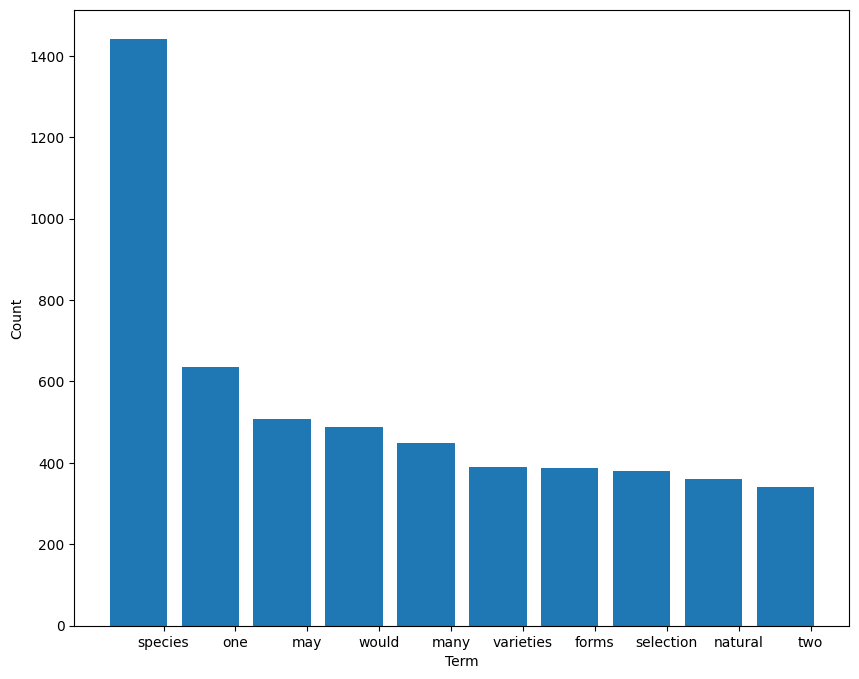

In [19]:
stop_words=set(stopwords.words("english"))


with open(source_file) as file: # open file
    txt = file.read()  # assign contents to a variable


txt = txt.lower()  # lower case text
txt = re.sub(r'[^\w\s]','',txt)  #remove punctuation

all_words=word_tokenize(txt)


filtered_word=[]
for w in all_words:
    if w not in stop_words:
        filtered_word.append(w)

counts = dict(Counter(filtered_word).most_common(10))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.figure(figsize=(10,8)) # change figsize to (width, height), to the size you want

plt.bar(indexes, values)

plt.xlabel("Term")
plt.ylabel("Count")

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()



### Dispersion Plots

This is a technique for visualizing where particular terms appear in a text, e.g. Is the term found consistently throughout a text or does it tend to be found in one area.

If we use the tweets.txt file, because the tweets are listed chronologically, we can get an impression of how common certain terms are at particular times.

Two terms are specified in the last line of the code but more can be entered. Change the terms as appropriate to your input files.

/Users/xan/.pyenv/versions/3.12.2/envs/venv/lib/python3.12/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded (please install Tkinter library).")


<Figure size 1000x800 with 0 Axes>

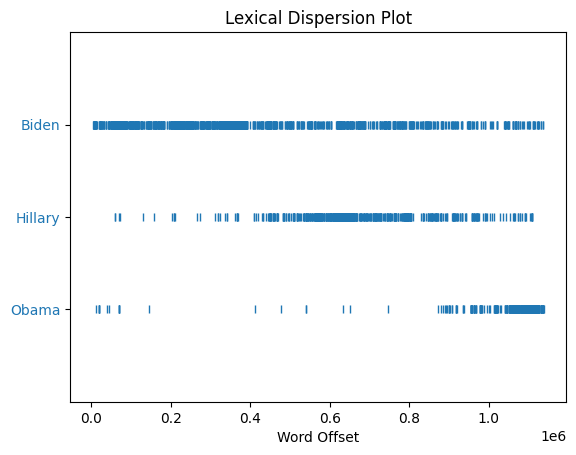

In [20]:
import os
import nltk
import matplotlib.pyplot as plt


input_file=open('tweets.txt').read()

tokens=nltk.word_tokenize(input_file)


text=nltk.Text(tokens)

plt.figure(figsize=(10, 8))  # change figsize to (width, height), to the size you want


text.dispersion_plot(["Obama","Hillary","Biden"])


## Further Exercises

Experiment by analysing different text files. A selection can be found here (or use a file of you own choosing):

[https://learn.edina.ac.uk/inter-ta](https://learn.edina.ac.uk/inter-ta)

Once the file has been saved to your computer, go back to the Noteable home tab in the browser.

* Select 'Upload' from the top right of the page. 
* Browse to the file.
* Click 'Select'
* Click on the blue 'Upload' button

The file is now available to be used in Noteable.

In the code blocks replace the original filename with the name of your file.